# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)

6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [96]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import models
from tensorflow.keras import layers

In [ ]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Q2Assignments/CarPrice_Assignment.csv')

In [ ]:
from google.colab import files
uploaded = files.upload()

In [99]:
df = pd.read_csv('CarPrice_Assignment.csv')

In [100]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [101]:
df.describe

<bound method NDFrame.describe of      car_ID  symboling                   CarName  ... citympg highwaympg    price
0         1          3        alfa-romero giulia  ...      21         27  13495.0
1         2          3       alfa-romero stelvio  ...      21         27  16500.0
2         3          1  alfa-romero Quadrifoglio  ...      19         26  16500.0
3         4          2               audi 100 ls  ...      24         30  13950.0
4         5          2                audi 100ls  ...      18         22  17450.0
..      ...        ...                       ...  ...     ...        ...      ...
200     201         -1           volvo 145e (sw)  ...      23         28  16845.0
201     202         -1               volvo 144ea  ...      19         25  19045.0
202     203         -1               volvo 244dl  ...      18         23  21485.0
203     204         -1                 volvo 246  ...      26         27  22470.0
204     205         -1               volvo 264gl  ...      19   

In [102]:
print(df.shape)

(205, 26)


In [103]:
print(df.columns)

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


In [104]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [106]:
from sklearn.preprocessing import LabelEncoder 

In [107]:
labelencoder=LabelEncoder()
df['fueltype']=labelencoder.fit_transform(df['fueltype']) #see other works, methods, function calling list convert
df['aspiration']=labelencoder.fit_transform(df['aspiration'])
df['carbody']=labelencoder.fit_transform(df['carbody'])
df['drivewheel']=labelencoder.fit_transform(df['drivewheel'])
df['enginelocation']=labelencoder.fit_transform(df['enginelocation'])
df['fuelsystem']=labelencoder.fit_transform(df['fuelsystem'])

In [108]:
df['doornumber']=df['doornumber'].map({'two':2,'four':4})
#for others, one-hot encode ifconversion inevitable, or drop

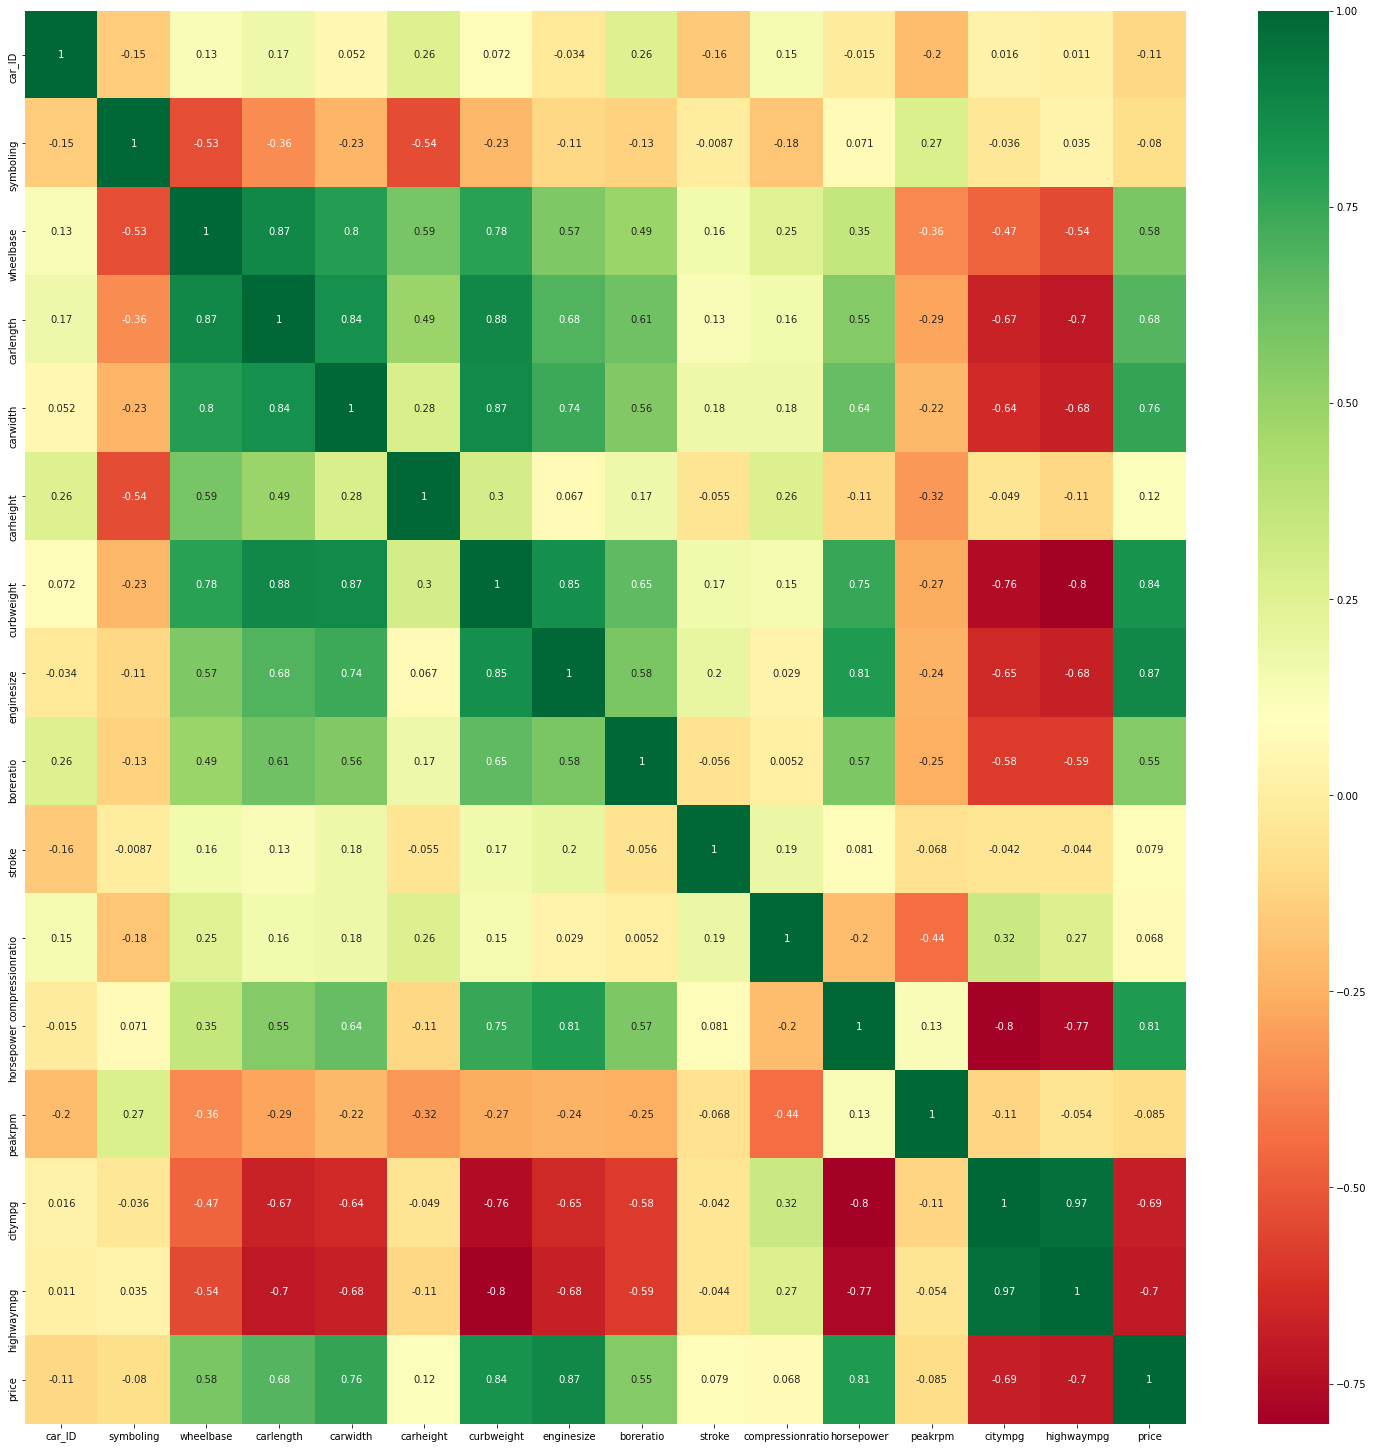

In [109]:
corrmat=df.corr() #feature engineering in ML. dropping in DL auto mostly, drop which has no relationship
top_corr_features=corrmat.index #see independent and dependent variables. multi-co-linearity of independent variables among themselves should not exist
plt.figure(figsize=(26,26))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


In [110]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,dohc,four,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,ohcv,six,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,1,0,4,3,1,0,99.8,176.6,66.2,54.3,2337,ohc,four,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,1,0,4,3,0,0,99.4,176.6,66.4,54.3,2824,ohc,five,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [111]:
data1 = data[['drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize', 'boreratio', 'horsepower', 'price']]
#column with strong relationship with price

In [112]:
print(data1.shape)
data1.head()

(205, 10)


,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price
0,rwd,front,88.6,168.8,64.1,2548,130,3.47,111,13495.0
1,rwd,front,88.6,168.8,64.1,2548,130,3.47,111,16500.0
2,rwd,front,94.5,171.2,65.5,2823,152,2.68,154,16500.0
3,fwd,front,99.8,176.6,66.2,2337,109,3.19,102,13950.0
4,4wd,front,99.4,176.6,66.4,2824,136,3.19,115,17450.0


SPLIT DATA

In [113]:
x=(data1.loc[:,data1.columns != 'price'])
y=(data1.loc[:,data1.columns == 'price'])
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=.3, random_state=0) #manually slice divide 700:300 +shuffle, SAMPLING
#no shuffle in time series

CREATE MODEL

In [115]:
from tensorflow.keras import models
from tensorflow.keras import layers
def build_model():
  model=models.Sequential()
  model.add(layers.Dense(20,activation='relu',input_shape=(x_train.shape[1],))) #tuple 1, 9-1, 100-0
  model.add(layers.Dense(10,activation='relu'))
  model.add(layers.Dense(8,activation='relu'))
  model.add(layers.Dense(6,activation='relu'))
  model.add(layers.Dense(1,activation='sigmoid'))
  return model
  #when classification problem, confusion matrix accuracy, precision, recall is used, this is not classification problem

In [116]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [ ]:
build_model

<function __main__.build_model>

In [ ]:
model.fit(x_train, y_train, epochs=100) 

NameError: ignored

In [ ]:
#print(x), x_train, x_train.values

In [ ]:
y_pred=model.predict(x_test) #load result on kaggle to receive %result #holdout validation?